In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
df = pd.read_csv('C:/Users/fredo/Downloads/playerdatabase.csv')

In [5]:
df['Min'] = df['Min'].str.replace(',', '').astype(float)

In [8]:
print([repr(col) for col in df.columns])

["'Player'", "'Nation'", "'Pos'", "'Squad'", "'Comp'", "'Age'", "'Born'", "'MP'", "'Starts'", "'Min'", "'90s'", "'Goals'", "'Assists'", "'G+A'", "'G-PK'", "'PK'", "'PK_Attempted'", "'Yellow'", "'Red'", "'xG'", "'npxG'", "'xAG'", "'npxG+xAG'", "'Prg_Carries'", "'Prg_Passes'", "'Prg_Passes_Received'", "'Goals_per90'", "'Assists_per90'", "'G+A_per90'", "'G-PK_per90'", "'G+A-PK_per90'", "'xG_per90'", "'xAG_per90'", "'xG+xAG_per90'", "'npxG_per90'", "'npxG+xAG_per90'", "'Matches'", "'Unnamed: 0'", "'Position'", "'Competition'", "'Age_shooting'", "'Born_shooting'", "'90s_shooting'", "'Shots_total'", "'Shots_on_target'", "'Shots_on_target_%'", "'Shots_total_per90'", "'Shots_on_target_per90'", "'Goals_per_shot'", "'Goals_per_shot_on_target'", "'Average_shot_distance'", "'Shots_free_kicks'", "'XG'", "'Npxg'", "'Npxg_per_shot'", "'Xg_net'", "'Npxg_net'", "'Unnamed: 0_passing'", "'Pos_passing'", "'Comp_passing'", "'Age_passing'", "'Born_passing'", "'90s_passing'", "'Passes_Total_Cmp'", "'Passes_T

In [7]:
df['Min'] = df['Min'].replace(0, pd.NA)

columns_to_convert = [
    'Progressive_Passes_Received', 'Interceptionsdefense', 'Passes_Blockeddefense', 'Tackles_Won',
    'Crosses', 'Switches', 'Through_Balls', 'Progressive_Passes', 'Key_Passes',
    'Clearances', 'Blocks', 'Dribblers_Tackled', 'Tackles_Def_3rd', 'Tackles_Mid_3rd', 'Tackles_Att_3rd',
    'Tackles_Wondefense', 'Aerials_Won', 'Ball_Recoveries', 'Progressive_Carries', 'Touches',
    'Passes_1/3', 'Passes_Penalty_Area', 'Crosses_Penalty_Area']

for col in columns_to_convert:
    df[col + '_per90'] = (df[col] / df['Min']) * 90  
    df.drop(columns=[col], inplace=True)           

df.fillna(0, inplace=True)

In [9]:
df = df.rename(columns={'Passes_Blockeddefense_per90': 'Passes_Blocked_per90', 'Tackles_Wondefense_per90': 'Tackles_Won_per90',
                       'Interceptionsdefense_per90': 'Interceptions_per90'})

In [12]:
DEFENDERS = df[df['Pos'] == 'DF']
MIDFIELDERS = df[df['Pos'] == 'MF']
FORWARDS = df[df['Pos'] == 'FW']

In [13]:
df.to_csv('playerdatabaseupdate.csv', index=False)

In [15]:
params=['Goals', 'Assists','Goals_per90', 'Assists_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xAG_per90', 
        'xG+xAG_per90', 'npxG_per90', 'npxG+xAG_per90','Shots_total_per90', 'Shots_on_target_per90','Take_Ons_Attempted',
        '1/3_Carries','Carries_Penalty_Area','Shot_Creating_Action_per90','Goal_Creating_Action_90','Plus/Minus_per_90',
        'xG_Plus/Minus_per_90','Fouls_Drawn', 'Offsides','Percentage_of_Aerials_Won','Dribblers_Tackle_W%',
        'Progressive_Passes_Received_per90', 'Interceptions_per90', 'Passes_Blocked_per90', 'Tackles_Won_per90', 
        'Crosses_per90', 'Switches_per90', 'Through_Balls_per90', 'Progressive_Passes_per90', 
        'Key_Passes_per90', 'Clearances_per90', 'Blocks_per90', 'Dribblers_Tackled_per90', 'Tackles_Def_3rd_per90', 
        'Tackles_Mid_3rd_per90', 'Tackles_Att_3rd_per90', 'Tackles_Won_per90', 'Aerials_Won_per90', 
        'Ball_Recoveries_per90', 'Progressive_Carries_per90', 'Touches_per90', 'Passes_1/3_per90', 
        'Passes_Penalty_Area_per90', 'Crosses_Penalty_Area_per90']

In [16]:
defender_ranks = DEFENDERS[params].rank(pct=True) * 100
midfielder_ranks = MIDFIELDERS[params].rank(pct=True) * 100
forwards_ranks = FORWARDS[params].rank(pct=True) * 100

defender_ranks = defender_ranks.round(0)
midfielder_ranks = midfielder_ranks.round(0)
forwards_ranks = forwards_ranks.round(0)

In [ ]:
#similarity

In [17]:
from sklearn.decomposition import PCA
import numpy as np

# Identify features to minimize
negative_features = ['Yellow', 'Red', 'Second_Yellow', 'Fouls_Committed',
                     'Aerials_Lost','Miscontrols','Dispossessed', 'Penalty_Kicks_Conceded']

# Reverse the sign of negative features
for feature in negative_features:
    if feature in DEFENDERS.columns:
        DEFENDERS[feature] = -DEFENDERS[feature]

C:\Users\fredo\AppData\Local\Temp\ipykernel_14660\2629262604.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DEFENDERS[feature] = -DEFENDERS[feature]


In [18]:
# Normalize data
numerical_defense_players = DEFENDERS[params].replace([np.inf, -np.inf], 0)
normalized_defense_players = (numerical_defense_players - numerical_defense_players.mean()) / numerical_defense_players.std()

# Apply PCA
pca = PCA()
pca.fit(normalized_defense_players)
explained_variances = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variances >= 0.95) + 1

In [19]:
# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
transformed_players = pca.fit_transform(normalized_defense_players)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=DEFENDERS.index)

In [20]:
# Get de Ligt's row and compute cosine similarity
Robinson_index = DEFENDERS.index[DEFENDERS['Player'] == 'Antonee Robinson'][0]
Robinson_data = transformed_df.loc[Robinson_index].values.reshape(1, -1)

# Remove de Ligt from the dataset for comparison
transformed_df = transformed_df.drop(index=Robinson_index)

In [30]:
from sklearn.metrics.pairwise import cosine_similarity
# Compute cosine similarity
similarity_scores = cosine_similarity(transformed_df, Robinson_data).flatten()
transformed_df['similarity_to_Robinson'] = similarity_scores

# Get top 10 players most similar to de Ligt
top_similar_players_indices = transformed_df.sort_values('similarity_to_Robinson', ascending=False).index
top_similar_players = DEFENDERS.loc[top_similar_players_indices]

In [26]:
Robinson_data_df = pd.DataFrame(Robinson_data)

In [29]:
# Ensure the same columns in both dataframes
transformed_df = transformed_df[Robinson_data_df.columns]


In [31]:
DEFENDERS['similarity_to_Robinson'] = transformed_df['similarity_to_Robinson']
defense_players_sorted = DEFENDERS.sort_values(by='similarity_to_Robinson', ascending=False)
defense_players_sorted

C:\Users\fredo\AppData\Local\Temp\ipykernel_14660\2772235495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DEFENDERS['similarity_to_Robinson'] = transformed_df['similarity_to_Robinson']


,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Tackles_Att_3rd_per90,Tackles_Won_per90,Aerials_Won_per90,Ball_Recoveries_per90,Progressive_Carries_per90,Touches_per90,Passes_1/3_per90,Passes_Penalty_Area_per90,Crosses_Penalty_Area_per90,similarity_to_Robinson
1637,Phillipp Mwene,at AUT,DF,Mainz 05,de Bundesliga,31-000,1994.0,19,19,1680.0,...,0.214286,0.857143,0.482143,3.267857,2.142857,50.035714,2.035714,1.232143,0.642857,0.944616
2271,Nuno Tavares,pt POR,DF,Lazio,it Serie A,25-003,2000.0,16,15,1227.0,...,0.366748,1.246944,0.660147,5.427873,4.767726,64.621027,3.520782,2.347188,1.320293,0.927248
54,Rayan Aït-Nouri,dz ALG,DF,Wolves,eng Premier League,23-237,2001.0,22,22,1881.0,...,0.143541,1.387560,0.574163,4.545455,2.344498,57.320574,2.153110,0.956938,0.191388,0.864797
982,Lewis Hall,eng ENG,DF,Newcastle Utd,eng Premier League,20-143,2004.0,23,20,1833.0,...,0.392799,1.325696,1.374795,4.615385,1.816694,73.453355,4.713584,0.638298,0.147300,0.856708
2123,Nélson Semedo,pt POR,DF,Wolves,eng Premier League,31-074,1993.0,19,18,1608.0,...,0.335821,1.231343,1.063433,3.861940,1.958955,51.044776,2.630597,0.447761,0.223881,0.855860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,Ramon Hendriks,nl NED,DF,Stuttgart,de Bundesliga,23-195,2001.0,13,3,405.0,...,0.000000,0.666667,1.333333,2.888889,0.666667,61.555556,2.666667,0.000000,0.000000,-0.624388
512,Pietro Comuzzo,it ITA,DF,Fiorentina,it Serie A,19-344,2005.0,19,18,1605.0,...,0.168224,0.897196,2.747664,3.364486,0.280374,61.289720,2.579439,0.056075,0.000000,-0.624817
2533,Igor Zubeldia,es ESP,DF,Real Sociedad,es La Liga,27-305,1997.0,18,18,1565.0,...,0.115016,0.920128,2.587859,3.047923,0.805112,66.306709,3.450479,0.287540,0.000000,-0.633221
648,Issa Diop,fr FRA,DF,Fulham,eng Premier League,28-020,1997.0,16,12,1069.0,...,0.000000,0.841908,1.431244,2.946679,0.336763,61.711880,2.778297,0.084191,0.000000,-0.639093


C:\Users\fredo\AppData\Local\Temp\ipykernel_14660\2259427813.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(defense_players_sorted['Player'].head(15)[::-1], fontproperties=font_prop)


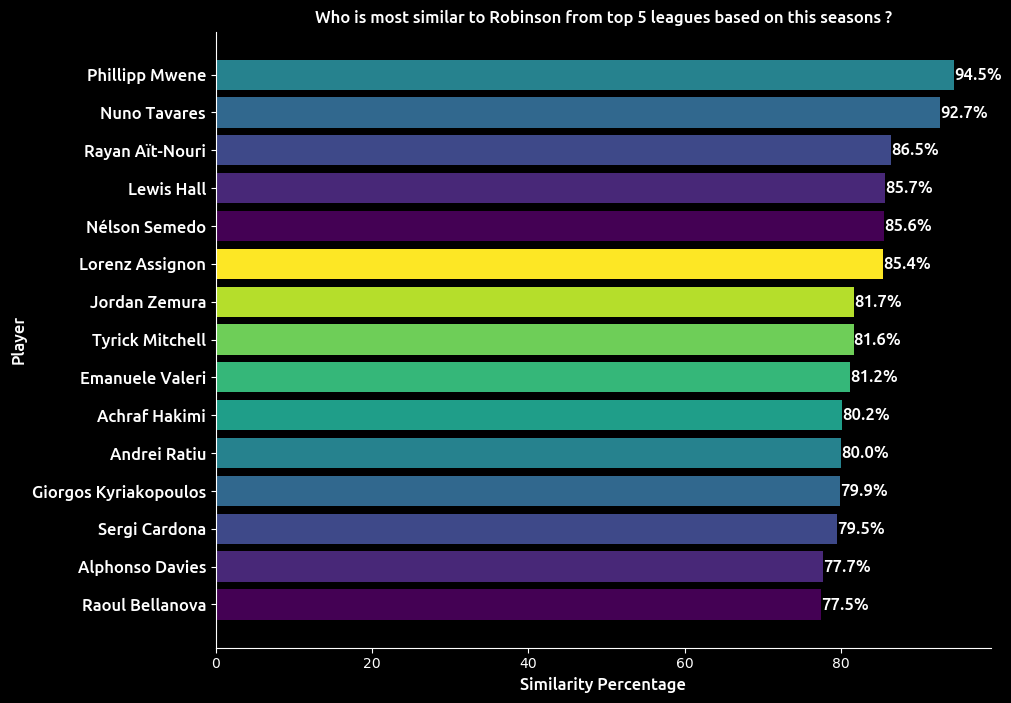

In [32]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font 
font_path = 'C:/Users/fredo/Downloads/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')



# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(defense_players_sorted['Player'].head(15)[::-1], (defense_players_sorted['similarity_to_Robinson'].head(15)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to Robinson from top 5 leagues based on this seasons ?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(defense_players_sorted['Player'].head(15)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('SimilarRobinson.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()

In [33]:
defense_players_sorted.head(10)

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Tackles_Att_3rd_per90,Tackles_Won_per90,Aerials_Won_per90,Ball_Recoveries_per90,Progressive_Carries_per90,Touches_per90,Passes_1/3_per90,Passes_Penalty_Area_per90,Crosses_Penalty_Area_per90,similarity_to_Robinson
1637,Phillipp Mwene,at AUT,DF,Mainz 05,de Bundesliga,31-000,1994.0,19,19,1680.0,...,0.214286,0.857143,0.482143,3.267857,2.142857,50.035714,2.035714,1.232143,0.642857,0.944616
2271,Nuno Tavares,pt POR,DF,Lazio,it Serie A,25-003,2000.0,16,15,1227.0,...,0.366748,1.246944,0.660147,5.427873,4.767726,64.621027,3.520782,2.347188,1.320293,0.927248
54,Rayan Aït-Nouri,dz ALG,DF,Wolves,eng Premier League,23-237,2001.0,22,22,1881.0,...,0.143541,1.387560,0.574163,4.545455,2.344498,57.320574,2.153110,0.956938,0.191388,0.864797
982,Lewis Hall,eng ENG,DF,Newcastle Utd,eng Premier League,20-143,2004.0,23,20,1833.0,...,0.392799,1.325696,1.374795,4.615385,1.816694,73.453355,4.713584,0.638298,0.147300,0.856708
2123,Nélson Semedo,pt POR,DF,Wolves,eng Premier League,31-074,1993.0,19,18,1608.0,...,0.335821,1.231343,1.063433,3.861940,1.958955,51.044776,2.630597,0.447761,0.223881,0.855860
151,Lorenz Assignon,tg TOG,DF,Rennes,fr Ligue 1,24-221,2000.0,17,13,1125.0,...,0.080000,0.880000,1.440000,3.840000,4.160000,67.440000,2.800000,0.960000,0.320000,0.854446
2515,Jordan Zemura,zw ZIM,DF,Udinese,it Serie A,25-076,1999.0,18,11,1121.0,...,0.240856,0.963426,0.240856,4.014273,1.685995,47.047279,1.525424,0.883140,0.561998,0.817031
1565,Tyrick Mitchell,eng ENG,DF,Crystal Palace,eng Premier League,25-150,1999.0,23,23,2003.0,...,0.179730,1.842237,0.584124,4.897654,1.932102,51.852222,1.572641,1.033450,0.539191,0.816446
2366,Emanuele Valeri,it ITA,DF,Parma,it Serie A,26-053,1998.0,19,18,1488.0,...,0.120968,0.846774,0.544355,3.024194,2.177419,47.116935,2.358871,0.907258,0.423387,0.812165
981,Achraf Hakimi,ma MAR,DF,Paris S-G,fr Ligue 1,26-086,1998.0,15,15,1298.0,...,0.554700,1.941448,0.416025,6.309707,4.645609,103.867488,5.408320,1.733436,0.485362,0.802070


In [34]:
Rayan=DEFENDERS[DEFENDERS['Player']=='Rayan Aït-Nouri']
Rayan

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Tackles_Att_3rd_per90,Tackles_Won_per90,Aerials_Won_per90,Ball_Recoveries_per90,Progressive_Carries_per90,Touches_per90,Passes_1/3_per90,Passes_Penalty_Area_per90,Crosses_Penalty_Area_per90,similarity_to_Robinson
54,Rayan Aït-Nouri,dz ALG,DF,Wolves,eng Premier League,23-237,2001.0,22,22,1881.0,...,0.143541,1.38756,0.574163,4.545455,2.344498,57.320574,2.15311,0.956938,0.191388,0.864797


In [39]:
rayan_ranks = defender_ranks.loc[54]

In [40]:
# Extract the percentile ranks, transpose, and sort them in descending order
rayan_sorted = rayan_ranks.T.sort_values(ascending=False)
rayan_sorted

Take_Ons_Attempted                   100.0
Goals                                 99.0
Assists                               99.0
Carries_Penalty_Area                  99.0
G+A_per90                             97.0
1/3_Carries                           97.0
G+A-PK_per90                          97.0
Assists_per90                         96.0
Fouls_Drawn                           95.0
G-PK_per90                            93.0
Goals_per90                           93.0
Goal_Creating_Action_90               91.0
Offsides                              91.0
Progressive_Carries_per90             90.0
npxG+xAG_per90                        89.0
Through_Balls_per90                   88.0
Tackles_Def_3rd_per90                 88.0
xG+xAG_per90                          88.0
Progressive_Passes_Received_per90     87.0
Shots_total_per90                     87.0
npxG_per90                            87.0
xAG_per90                             86.0
xG_per90                              86.0
Passes_Bloc

In [41]:
# Get the top 20 parameters
top_30_params = rayan_sorted.index[:30]
top_30_params_values = rayan_sorted.head(30)

# Display the top 20 parameters and their values
print("Top 30 Parameters:")
print(top_30_params)
print("Values:")
print(top_30_params_values)

Top 30 Parameters:
Index(['Take_Ons_Attempted', 'Goals', 'Assists', 'Carries_Penalty_Area',
       'G+A_per90', '1/3_Carries', 'G+A-PK_per90', 'Assists_per90',
       'Fouls_Drawn', 'G-PK_per90', 'Goals_per90', 'Goal_Creating_Action_90',
       'Offsides', 'Progressive_Carries_per90', 'npxG+xAG_per90',
       'Through_Balls_per90', 'Tackles_Def_3rd_per90', 'xG+xAG_per90',
       'Progressive_Passes_Received_per90', 'Shots_total_per90', 'npxG_per90',
       'xAG_per90', 'xG_per90', 'Passes_Blocked_per90',
       'Shot_Creating_Action_per90', 'Passes_Penalty_Area_per90',
       'Key_Passes_per90', 'Ball_Recoveries_per90', 'Crosses_per90',
       'Shots_on_target_per90'],
      dtype='object')
Values:
Take_Ons_Attempted                   100.0
Goals                                 99.0
Assists                               99.0
Carries_Penalty_Area                  99.0
G+A_per90                             97.0
1/3_Carries                           97.0
G+A-PK_per90                      

In [42]:
rayan_sorted = rayan_sorted.drop_duplicates()

In [46]:
rayan_params = ['Carries_Penalty_Area', 'Assists_per90', 'Take_Ons_Attempted', '1/3_Carries',
               'Goal_Creating_Action_90', 'Progressive_Carries_per90', 'Through_Balls_per90',
               'Tackles_Def_3rd_per90', 'Progressive_Passes_Received_per90', 'xAG_per90',
               'Passes_Blocked_per90', 'Ball_Recoveries_per90', 'Key_Passes_per90', 'Tackles_Won_per90', 'Dribblers_Tackle_W%']

split_params = [rayan_params.replace('_', '\n') for rayan_params in rayan_params]

In [47]:
rayanrankslist = rayan_ranks[['Carries_Penalty_Area', 'Assists_per90', 'Take_Ons_Attempted', '1/3_Carries',
               'Goal_Creating_Action_90', 'Progressive_Carries_per90', 'Through_Balls_per90',
               'Tackles_Def_3rd_per90', 'Progressive_Passes_Received_per90', 'xAG_per90',
               'Passes_Blocked_per90', 'Ball_Recoveries_per90', 'Key_Passes_per90', 'Tackles_Won_per90', 'Dribblers_Tackle_W%']]
rayanrankslist

Carries_Penalty_Area                  99.0
Assists_per90                         96.0
Take_Ons_Attempted                   100.0
1/3_Carries                           97.0
Goal_Creating_Action_90               91.0
Progressive_Carries_per90             90.0
Through_Balls_per90                   88.0
Tackles_Def_3rd_per90                 88.0
Progressive_Passes_Received_per90     87.0
xAG_per90                             86.0
Passes_Blocked_per90                  86.0
Ball_Recoveries_per90                 78.0
Key_Passes_per90                      83.0
Tackles_Won_per90                     75.0
Tackles_Won_per90                     75.0
Tackles_Won_per90                     75.0
Tackles_Won_per90                     75.0
Dribblers_Tackle_W%                   65.0
Name: 54, dtype: float64

In [48]:
rayanrankslist = rayanrankslist[~rayanrankslist.index.duplicated(keep='first')]

In [50]:
ARlist = rayanrankslist.values.flatten().tolist()

ARlist

[99.0,
 96.0,
 100.0,
 97.0,
 91.0,
 90.0,
 88.0,
 88.0,
 87.0,
 86.0,
 86.0,
 78.0,
 83.0,
 75.0,
 65.0]

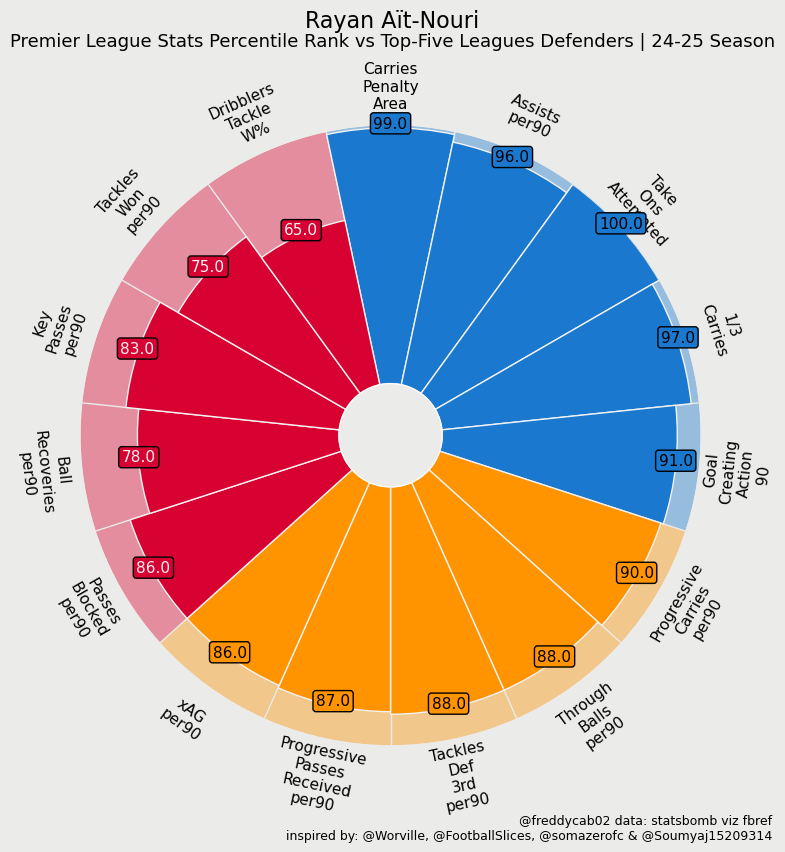

In [52]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    ARlist,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Rayan Aït-Nouri", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Premier League Stats Percentile Rank vs Top-Five Leagues Defenders | 24-25 Season",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@freddycab02 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)

plt.savefig('Rayan_Percentile.png', dpi=500, bbox_inches='tight')  
plt.show()

In [53]:
Tyrick=DEFENDERS[DEFENDERS['Player']=='Tyrick Mitchell']
Tyrick

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Tackles_Att_3rd_per90,Tackles_Won_per90,Aerials_Won_per90,Ball_Recoveries_per90,Progressive_Carries_per90,Touches_per90,Passes_1/3_per90,Passes_Penalty_Area_per90,Crosses_Penalty_Area_per90,similarity_to_Robinson
1565,Tyrick Mitchell,eng ENG,DF,Crystal Palace,eng Premier League,25-150,1999.0,23,23,2003.0,...,0.17973,1.842237,0.584124,4.897654,1.932102,51.852222,1.572641,1.03345,0.539191,0.816446


In [55]:
Tyrick_ranks = defender_ranks.loc[1565]

In [56]:
# Extract the percentile ranks, transpose, and sort them in descending order
Tyrick_sorted = Tyrick_ranks.T.sort_values(ascending=False)
Tyrick_sorted

Assists                              97.0
Passes_Blocked_per90                 97.0
1/3_Carries                          95.0
xAG_per90                            94.0
Fouls_Drawn                          94.0
Carries_Penalty_Area                 93.0
Take_Ons_Attempted                   93.0
Blocks_per90                         92.0
Tackles_Won_per90                    91.0
Tackles_Won_per90                    91.0
Tackles_Def_3rd_per90                91.0
Tackles_Won_per90                    91.0
Tackles_Won_per90                    91.0
xG+xAG_per90                         90.0
npxG+xAG_per90                       90.0
Key_Passes_per90                     90.0
Progressive_Passes_Received_per90    89.0
Passes_Penalty_Area_per90            87.0
Crosses_Penalty_Area_per90           87.0
Assists_per90                        87.0
Shot_Creating_Action_per90           86.0
Crosses_per90                        86.0
Progressive_Carries_per90            84.0
Ball_Recoveries_per90             

In [59]:
# Get the top 20 parameters
top_30_params = Tyrick_sorted.index[:30]
top_30_params_values = Tyrick_sorted.head(30)

# Display the top 20 parameters and their values
print("Top 30 Parameters:")
print(top_30_params)
print("Values:")
print(top_30_params_values)

Top 30 Parameters:
Index(['Assists', '1/3_Carries', 'xAG_per90', 'Carries_Penalty_Area',
       'Blocks_per90', 'Tackles_Won_per90', 'xG+xAG_per90',
       'Progressive_Passes_Received_per90', 'Passes_Penalty_Area_per90',
       'Shot_Creating_Action_per90', 'Progressive_Carries_per90',
       'Goal_Creating_Action_90', 'G+A-PK_per90', 'Tackles_Att_3rd_per90',
       'Shots_on_target_per90', 'Plus/Minus_per_90',
       'Percentage_of_Aerials_Won', 'Dribblers_Tackled_per90', 'xG_per90',
       'Shots_total_per90', 'G-PK_per90', 'Through_Balls_per90',
       'Clearances_per90', 'Progressive_Passes_per90', 'Passes_1/3_per90',
       'Interceptions_per90'],
      dtype='object')
Values:
Assists                              97.0
1/3_Carries                          95.0
xAG_per90                            94.0
Carries_Penalty_Area                 93.0
Blocks_per90                         92.0
Tackles_Won_per90                    91.0
xG+xAG_per90                         90.0
Progressive_Pa

In [58]:
Tyrick_sorted = Tyrick_sorted.drop_duplicates()

In [60]:
Tyrick_params = ['Assists','1/3_Carries', 'xAG_per90', 'Carries_Penalty_Area', 'Blocks_per90', 'Tackles_Won_per90',
                'Progressive_Passes_Received_per90', 'Passes_Penalty_Area_per90', 'Shot_Creating_Action_per90',
                'Progressive_Carries_per90', 'Goal_Creating_Action_90', 'Tackles_Att_3rd_per90', 'Dribblers_Tackled_per90',
                'xG_per90', 'Shots_total_per90'] 

split_params = [Tyrick_params.replace('_', '\n') for Tyrick_params in Tyrick_params]

In [61]:
Tyrickrankslist = Tyrick_ranks[['Assists','1/3_Carries', 'xAG_per90', 'Carries_Penalty_Area', 'Blocks_per90', 'Tackles_Won_per90',
                'Progressive_Passes_Received_per90', 'Passes_Penalty_Area_per90', 'Shot_Creating_Action_per90',
                'Progressive_Carries_per90', 'Goal_Creating_Action_90', 'Tackles_Att_3rd_per90', 'Dribblers_Tackled_per90',
                'xG_per90', 'Shots_total_per90']]
Tyrickrankslist

Assists                              97.0
1/3_Carries                          95.0
xAG_per90                            94.0
Carries_Penalty_Area                 93.0
Blocks_per90                         92.0
Tackles_Won_per90                    91.0
Tackles_Won_per90                    91.0
Tackles_Won_per90                    91.0
Tackles_Won_per90                    91.0
Progressive_Passes_Received_per90    89.0
Passes_Penalty_Area_per90            87.0
Shot_Creating_Action_per90           86.0
Progressive_Carries_per90            84.0
Goal_Creating_Action_90              78.0
Tackles_Att_3rd_per90                72.0
Dribblers_Tackled_per90              42.0
xG_per90                             41.0
Shots_total_per90                    39.0
Name: 1565, dtype: float64

In [62]:
Tyrickrankslist = Tyrickrankslist[~Tyrickrankslist.index.duplicated(keep='first')]

In [63]:
ARlist = Tyrickrankslist.values.flatten().tolist()

ARlist

[97.0,
 95.0,
 94.0,
 93.0,
 92.0,
 91.0,
 89.0,
 87.0,
 86.0,
 84.0,
 78.0,
 72.0,
 42.0,
 41.0,
 39.0]

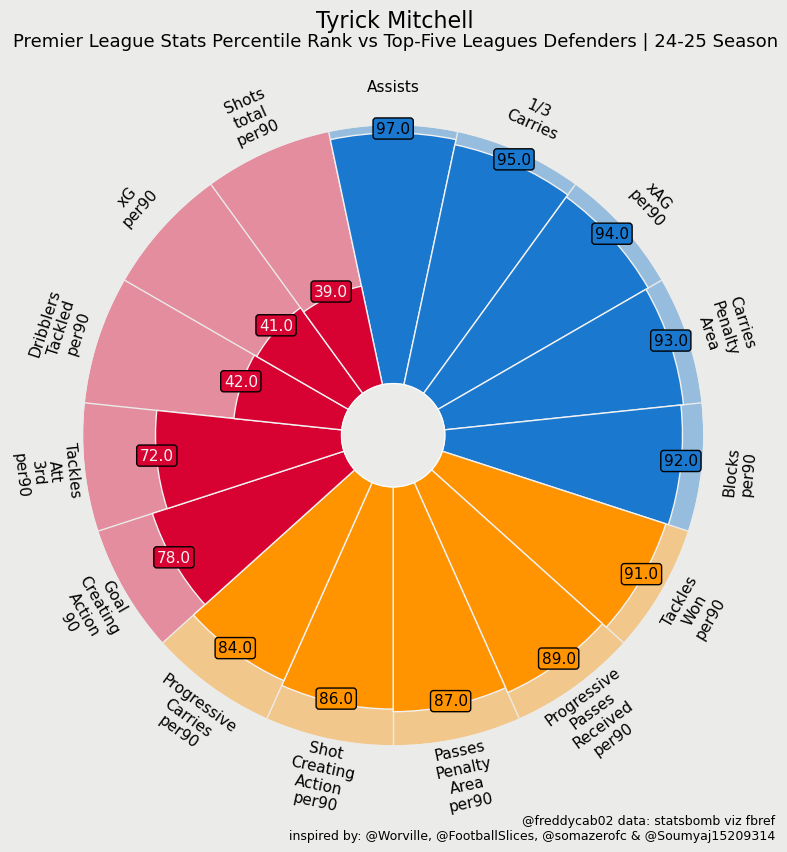

In [64]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    ARlist,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Tyrick Mitchell", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Premier League Stats Percentile Rank vs Top-Five Leagues Defenders | 24-25 Season",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@freddycab02 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)

plt.show()

In [65]:
jordan=DEFENDERS[DEFENDERS['Player']=='Jordan Zemura']
jordan

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Tackles_Att_3rd_per90,Tackles_Won_per90,Aerials_Won_per90,Ball_Recoveries_per90,Progressive_Carries_per90,Touches_per90,Passes_1/3_per90,Passes_Penalty_Area_per90,Crosses_Penalty_Area_per90,similarity_to_Robinson
2515,Jordan Zemura,zw ZIM,DF,Udinese,it Serie A,25-076,1999.0,18,11,1121.0,...,0.240856,0.963426,0.240856,4.014273,1.685995,47.047279,1.525424,0.88314,0.561998,0.817031


In [66]:
jordan_ranks = defender_ranks.loc[2515]

In [67]:
# Extract the percentile ranks, transpose, and sort them in descending order
jordan_sorted = jordan_ranks.T.sort_values(ascending=False)
jordan_sorted

Take_Ons_Attempted                   98.0
Assists                              92.0
Assists_per90                        91.0
G+A_per90                            91.0
Offsides                             91.0
G+A-PK_per90                         91.0
Progressive_Passes_Received_per90    89.0
Crosses_Penalty_Area_per90           88.0
Goal_Creating_Action_90              86.0
Carries_Penalty_Area                 85.0
1/3_Carries                          84.0
Shot_Creating_Action_per90           83.0
G-PK_per90                           83.0
Goals_per90                          83.0
Passes_Penalty_Area_per90            83.0
Goals                                82.0
Tackles_Att_3rd_per90                80.0
Crosses_per90                        79.0
xG_per90                             78.0
Progressive_Carries_per90            78.0
npxG_per90                           78.0
Shots_total_per90                    76.0
Passes_Blocked_per90                 76.0
npxG+xAG_per90                    

In [68]:
# Get the top 20 parameters
top_30_params = jordan_sorted.index[:30]
top_30_params_values = jordan_sorted.head(30)

# Display the top 20 parameters and their values
print("Top 30 Parameters:")
print(top_30_params)
print("Values:")
print(top_30_params_values)

Top 30 Parameters:
Index(['Take_Ons_Attempted', 'Assists', 'Assists_per90', 'G+A_per90',
       'Offsides', 'G+A-PK_per90', 'Progressive_Passes_Received_per90',
       'Crosses_Penalty_Area_per90', 'Goal_Creating_Action_90',
       'Carries_Penalty_Area', '1/3_Carries', 'Shot_Creating_Action_per90',
       'G-PK_per90', 'Goals_per90', 'Passes_Penalty_Area_per90', 'Goals',
       'Tackles_Att_3rd_per90', 'Crosses_per90', 'xG_per90',
       'Progressive_Carries_per90', 'npxG_per90', 'Shots_total_per90',
       'Passes_Blocked_per90', 'npxG+xAG_per90', 'xG+xAG_per90',
       'Tackles_Mid_3rd_per90', 'xAG_per90', 'Key_Passes_per90',
       'Shots_on_target_per90', 'Interceptions_per90'],
      dtype='object')
Values:
Take_Ons_Attempted                   98.0
Assists                              92.0
Assists_per90                        91.0
G+A_per90                            91.0
Offsides                             91.0
G+A-PK_per90                         91.0
Progressive_Passes_Receiv

In [69]:
jordan_sorted = jordan_sorted.drop_duplicates()

In [70]:
jordan_params = ['Take_Ons_Attempted', 'Assists_per90', 'G+A_per90', 'Progressive_Passes_Received_per90',
                 'Crosses_Penalty_Area_per90', 'Goal_Creating_Action_90', 'Carries_Penalty_Area', '1/3_Carries',
                 'Shot_Creating_Action_per90', 'Goals_per90', 'Passes_Penalty_Area_per90', 'Tackles_Att_3rd_per90', 
                 'Crosses_per90', 'xG_per90', 'Progressive_Carries_per90'] 

split_params = [jordan_params.replace('_', '\n') for jordan_params in jordan_params]

In [71]:
jordanrankslist = jordan_ranks[['Take_Ons_Attempted', 'Assists_per90', 'G+A_per90', 'Progressive_Passes_Received_per90',
                 'Crosses_Penalty_Area_per90', 'Goal_Creating_Action_90', 'Carries_Penalty_Area', '1/3_Carries',
                 'Shot_Creating_Action_per90', 'Goals_per90', 'Passes_Penalty_Area_per90', 'Tackles_Att_3rd_per90', 
                 'Crosses_per90', 'xG_per90', 'Progressive_Carries_per90']]
jordanrankslist

Take_Ons_Attempted                   98.0
Assists_per90                        91.0
G+A_per90                            91.0
Progressive_Passes_Received_per90    89.0
Crosses_Penalty_Area_per90           88.0
Goal_Creating_Action_90              86.0
Carries_Penalty_Area                 85.0
1/3_Carries                          84.0
Shot_Creating_Action_per90           83.0
Goals_per90                          83.0
Passes_Penalty_Area_per90            83.0
Tackles_Att_3rd_per90                80.0
Crosses_per90                        79.0
xG_per90                             78.0
Progressive_Carries_per90            78.0
Name: 2515, dtype: float64

In [72]:
jordanrankslist = jordanrankslist[~jordanrankslist.index.duplicated(keep='first')]

In [73]:
ARlist = jordanrankslist.values.flatten().tolist()

ARlist

[98.0,
 91.0,
 91.0,
 89.0,
 88.0,
 86.0,
 85.0,
 84.0,
 83.0,
 83.0,
 83.0,
 80.0,
 79.0,
 78.0,
 78.0]

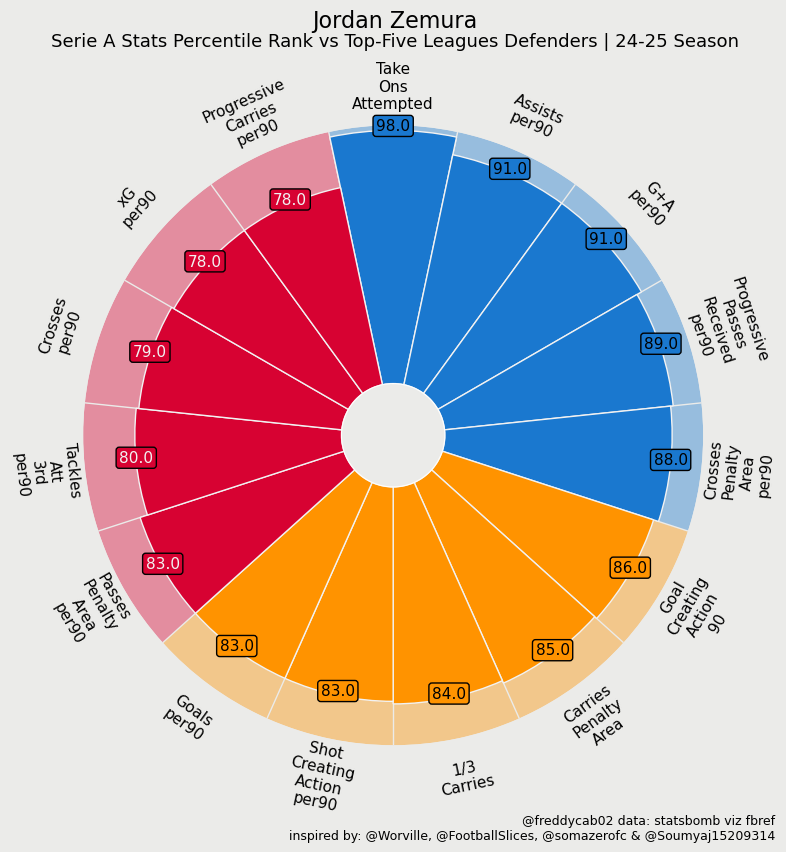

In [74]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    ARlist,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Jordan Zemura", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Serie A Stats Percentile Rank vs Top-Five Leagues Defenders | 24-25 Season",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@freddycab02 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)

plt.show()

In [76]:
yarek = DEFENDERS[DEFENDERS['Player']=='Yarek Gasiorowski']
yarek

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Tackles_Att_3rd_per90,Tackles_Won_per90,Aerials_Won_per90,Ball_Recoveries_per90,Progressive_Carries_per90,Touches_per90,Passes_1/3_per90,Passes_Penalty_Area_per90,Crosses_Penalty_Area_per90,similarity_to_Robinson
851,Yarek Gasiorowski,es ESP,DF,Valencia,es La Liga,20-017,2005.0,13,9,907.0,...,0.0,1.488423,2.381477,3.472988,0.893054,55.567806,3.671444,0.297685,0.099228,-0.534404


In [77]:
yarek_ranks = defender_ranks.loc[851]

In [78]:
# Extract the percentile ranks, transpose, and sort them in descending order
yarek_sorted = yarek_ranks.T.sort_values(ascending=False)
yarek_sorted

Interceptions_per90                  95.0
xG_per90                             94.0
npxG_per90                           94.0
Tackles_Def_3rd_per90                85.0
Through_Balls_per90                  82.0
Aerials_Won_per90                    81.0
Tackles_Won_per90                    80.0
Tackles_Won_per90                    80.0
Tackles_Won_per90                    80.0
Tackles_Won_per90                    80.0
Percentage_of_Aerials_Won            79.0
Dribblers_Tackle_W%                  79.0
npxG+xAG_per90                       75.0
Clearances_per90                     74.0
Passes_Blocked_per90                 74.0
xG+xAG_per90                         74.0
Passes_1/3_per90                     72.0
Blocks_per90                         65.0
Crosses_Penalty_Area_per90           60.0
Progressive_Passes_per90             56.0
Progressive_Carries_per90            54.0
Passes_Penalty_Area_per90            52.0
Key_Passes_per90                     50.0
Dribblers_Tackled_per90           

In [79]:
# Get the top 20 parameters
top_30_params = yarek_sorted.index[:30]
top_30_params_values = yarek_sorted.head(30)

# Display the top 20 parameters and their values
print("Top 30 Parameters:")
print(top_30_params)
print("Values:")
print(top_30_params_values)

Top 30 Parameters:
Index(['Interceptions_per90', 'xG_per90', 'npxG_per90',
       'Tackles_Def_3rd_per90', 'Through_Balls_per90', 'Aerials_Won_per90',
       'Tackles_Won_per90', 'Tackles_Won_per90', 'Tackles_Won_per90',
       'Tackles_Won_per90', 'Percentage_of_Aerials_Won', 'Dribblers_Tackle_W%',
       'npxG+xAG_per90', 'Clearances_per90', 'Passes_Blocked_per90',
       'xG+xAG_per90', 'Passes_1/3_per90', 'Blocks_per90',
       'Crosses_Penalty_Area_per90', 'Progressive_Passes_per90',
       'Progressive_Carries_per90', 'Passes_Penalty_Area_per90',
       'Key_Passes_per90', 'Dribblers_Tackled_per90', 'Crosses_per90',
       'Ball_Recoveries_per90', 'Switches_per90', 'Shot_Creating_Action_per90',
       'Goals', 'Goals_per90'],
      dtype='object')
Values:
Interceptions_per90           95.0
xG_per90                      94.0
npxG_per90                    94.0
Tackles_Def_3rd_per90         85.0
Through_Balls_per90           82.0
Aerials_Won_per90             81.0
Tackles_Won_per90 

In [80]:
yarek_sorted = yarek_sorted.drop_duplicates()

In [81]:
yarek_params = ['Interceptions_per90', 'xG_per90', 'Tackles_Def_3rd_per90', 'Through_Balls_per90', 'Aerials_Won_per90',
                'Tackles_Won_per90', 'Percentage_of_Aerials_Won', 'Dribblers_Tackle_W%', 'Clearances_per90',
                'Passes_Blocked_per90', 'Passes_1/3_per90', 'Crosses_Penalty_Area_per90', 
                'Blocks_per90', 'Progressive_Passes_per90', 'Progressive_Carries_per90'] 

split_params = [yarek_params.replace('_', '\n') for yarek_params in yarek_params]

In [83]:
yarekrankslist = yarek_ranks[['Interceptions_per90', 'xG_per90', 'Tackles_Def_3rd_per90', 'Through_Balls_per90', 'Aerials_Won_per90',
                'Tackles_Won_per90', 'Percentage_of_Aerials_Won', 'Dribblers_Tackle_W%', 'Clearances_per90',
                'Passes_Blocked_per90', 'Passes_1/3_per90', 'Crosses_Penalty_Area_per90', 
                'Blocks_per90', 'Progressive_Passes_per90', 'Progressive_Carries_per90']]
yarekrankslist

Interceptions_per90           95.0
xG_per90                      94.0
Tackles_Def_3rd_per90         85.0
Through_Balls_per90           82.0
Aerials_Won_per90             81.0
Tackles_Won_per90             80.0
Tackles_Won_per90             80.0
Tackles_Won_per90             80.0
Tackles_Won_per90             80.0
Percentage_of_Aerials_Won     79.0
Dribblers_Tackle_W%           79.0
Clearances_per90              74.0
Passes_Blocked_per90          74.0
Passes_1/3_per90              72.0
Crosses_Penalty_Area_per90    60.0
Blocks_per90                  65.0
Progressive_Passes_per90      56.0
Progressive_Carries_per90     54.0
Name: 851, dtype: float64

In [84]:
yarekrankslist = yarekrankslist[~yarekrankslist.index.duplicated(keep='first')]

In [85]:
ARlist = yarekrankslist.values.flatten().tolist()

ARlist

[95.0,
 94.0,
 85.0,
 82.0,
 81.0,
 80.0,
 79.0,
 79.0,
 74.0,
 74.0,
 72.0,
 60.0,
 65.0,
 56.0,
 54.0]

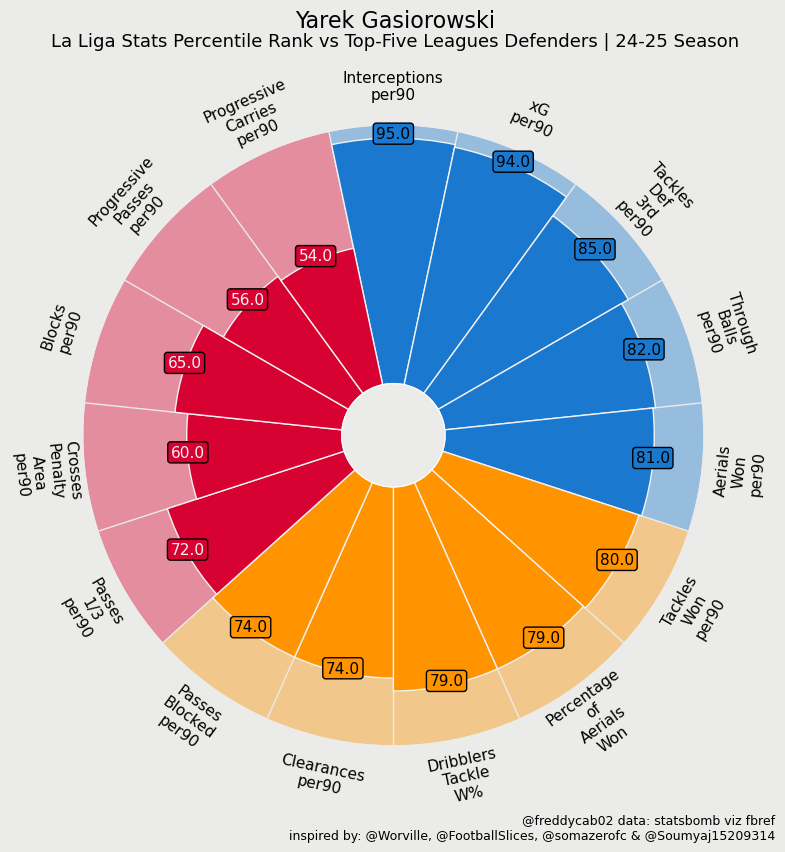

In [86]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    ARlist,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Yarek Gasiorowski", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"La Liga Stats Percentile Rank vs Top-Five Leagues Defenders | 24-25 Season",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@freddycab02 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)

plt.show()

In [87]:
konstantinos = DEFENDERS[DEFENDERS['Player']=='Konstantinos Koulierakis']
konstantinos

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Tackles_Att_3rd_per90,Tackles_Won_per90,Aerials_Won_per90,Ball_Recoveries_per90,Progressive_Carries_per90,Touches_per90,Passes_1/3_per90,Passes_Penalty_Area_per90,Crosses_Penalty_Area_per90,similarity_to_Robinson
1232,Konstantinos Koulierakis,gr GRE,DF,Wolfsburg,de Bundesliga,21-062,2003.0,17,15,1363.0,...,0.132062,0.79237,2.112986,3.103448,0.79237,71.37931,3.763756,0.462216,0.198092,0.187278


In [88]:
konstantinos_ranks = defender_ranks.loc[1232]

In [89]:
# Extract the percentile ranks, transpose, and sort them in descending order
konstantinos_sorted = konstantinos_ranks.T.sort_values(ascending=False)
konstantinos_sorted

Switches_per90                       98.0
Assists                              92.0
Clearances_per90                     89.0
Assists_per90                        87.0
Shots_total_per90                    85.0
Passes_Blocked_per90                 84.0
Blocks_per90                         81.0
Goal_Creating_Action_90              80.0
Plus/Minus_per_90                    77.0
G+A_per90                            77.0
G+A-PK_per90                         77.0
Aerials_Won_per90                    77.0
Through_Balls_per90                  75.0
1/3_Carries                          74.0
Touches_per90                        74.0
Passes_1/3_per90                     74.0
xAG_per90                            72.0
Crosses_Penalty_Area_per90           71.0
Progressive_Passes_per90             68.0
Take_Ons_Attempted                   66.0
Percentage_of_Aerials_Won            65.0
Key_Passes_per90                     64.0
Tackles_Att_3rd_per90                64.0
Passes_Penalty_Area_per90         

In [90]:
# Get the top 20 parameters
top_30_params =konstantinos_sorted.index[:30]
top_30_params_values = konstantinos_sorted.head(30)

# Display the top 20 parameters and their values
print("Top 30 Parameters:")
print(top_30_params)
print("Values:")
print(top_30_params_values)

Top 30 Parameters:
Index(['Switches_per90', 'Assists', 'Clearances_per90', 'Assists_per90',
       'Shots_total_per90', 'Passes_Blocked_per90', 'Blocks_per90',
       'Goal_Creating_Action_90', 'Plus/Minus_per_90', 'G+A_per90',
       'G+A-PK_per90', 'Aerials_Won_per90', 'Through_Balls_per90',
       '1/3_Carries', 'Touches_per90', 'Passes_1/3_per90', 'xAG_per90',
       'Crosses_Penalty_Area_per90', 'Progressive_Passes_per90',
       'Take_Ons_Attempted', 'Percentage_of_Aerials_Won', 'Key_Passes_per90',
       'Tackles_Att_3rd_per90', 'Passes_Penalty_Area_per90',
       'Tackles_Def_3rd_per90', 'Shots_on_target_per90',
       'Shot_Creating_Action_per90', 'Dribblers_Tackle_W%', 'xG+xAG_per90',
       'Dribblers_Tackled_per90'],
      dtype='object')
Values:
Switches_per90                98.0
Assists                       92.0
Clearances_per90              89.0
Assists_per90                 87.0
Shots_total_per90             85.0
Passes_Blocked_per90          84.0
Blocks_per90         

In [91]:
konstantinos_sorted = konstantinos_sorted.drop_duplicates()

In [92]:
konstantinos_params = ['Switches_per90', 'Clearances_per90', 'Assists_per90', 'Shots_total_per90', 'Passes_Blocked_per90',
                      'Blocks_per90', 'Goal_Creating_Action_90', 'Aerials_Won_per90', 'Through_Balls_per90', '1/3_Carries', 
                      'Dribblers_Tackle_W%', 'Passes_1/3_per90', 'Crosses_Penalty_Area_per90', 'Progressive_Passes_per90', 'Percentage_of_Aerials_Won'] 

split_params = [konstantinos_params.replace('_', '\n') for konstantinos_params in konstantinos_params]

In [93]:
konstantinosrankslist = konstantinos_ranks[['Switches_per90', 'Clearances_per90', 'Assists_per90', 'Shots_total_per90', 'Passes_Blocked_per90',
                      'Blocks_per90', 'Goal_Creating_Action_90', 'Aerials_Won_per90', 'Through_Balls_per90', '1/3_Carries', 
                      'Dribblers_Tackle_W%', 'Passes_1/3_per90', 'Crosses_Penalty_Area_per90', 'Progressive_Passes_per90', 'Percentage_of_Aerials_Won']]
konstantinosrankslist

Switches_per90                98.0
Clearances_per90              89.0
Assists_per90                 87.0
Shots_total_per90             85.0
Passes_Blocked_per90          84.0
Blocks_per90                  81.0
Goal_Creating_Action_90       80.0
Aerials_Won_per90             77.0
Through_Balls_per90           75.0
1/3_Carries                   74.0
Dribblers_Tackle_W%           60.0
Passes_1/3_per90              74.0
Crosses_Penalty_Area_per90    71.0
Progressive_Passes_per90      68.0
Percentage_of_Aerials_Won     65.0
Name: 1232, dtype: float64

In [94]:
konstantinosrankslist = konstantinosrankslist[~konstantinosrankslist.index.duplicated(keep='first')]

In [95]:
ARlist = konstantinosrankslist.values.flatten().tolist()

ARlist

[98.0,
 89.0,
 87.0,
 85.0,
 84.0,
 81.0,
 80.0,
 77.0,
 75.0,
 74.0,
 60.0,
 74.0,
 71.0,
 68.0,
 65.0]

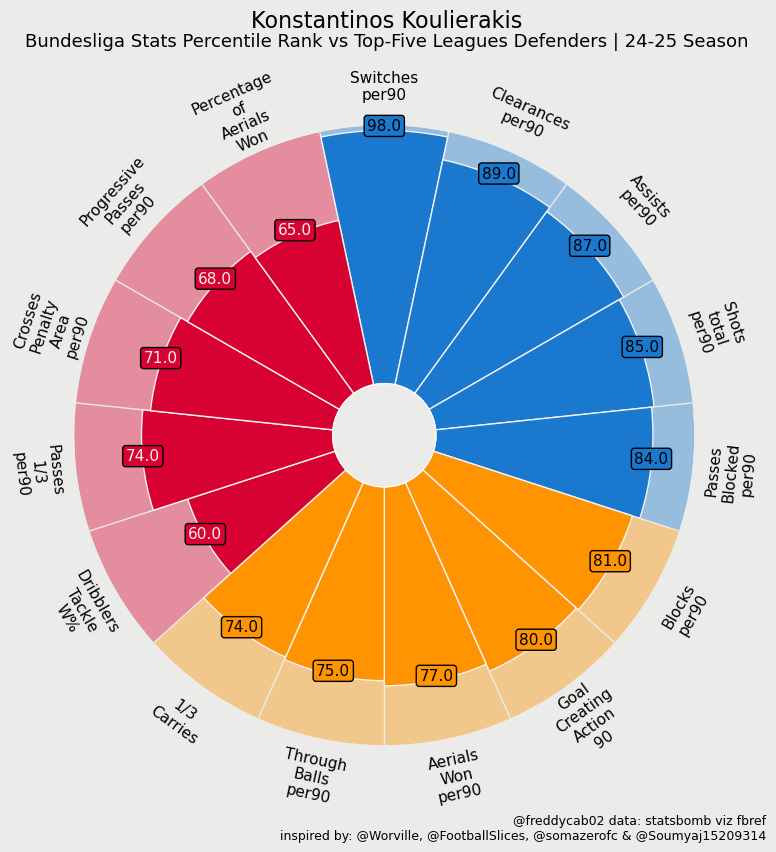

In [96]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    ARlist,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Konstantinos Koulierakis", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Bundesliga Stats Percentile Rank vs Top-Five Leagues Defenders | 24-25 Season",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@freddycab02 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)

plt.show()

In [98]:
lamine = MIDFIELDERS[MIDFIELDERS['Player']=='Lamine Camara']
lamine

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Tackles_Mid_3rd_per90,Tackles_Att_3rd_per90,Tackles_Won_per90,Aerials_Won_per90,Ball_Recoveries_per90,Progressive_Carries_per90,Touches_per90,Passes_1/3_per90,Passes_Penalty_Area_per90,Crosses_Penalty_Area_per90
388,Lamine Camara,sn SEN,MF,Monaco,fr Ligue 1,21-028,2004.0,16,14,1187.0,...,1.668071,0.454928,2.198821,0.909857,6.065712,1.213142,69.831508,4.85257,0.985678,0.227464


In [99]:
lamine_ranks = midfielder_ranks.loc[388]

In [100]:
# Extract the percentile ranks, transpose, and sort them in descending order
lamine_sorted = lamine_ranks.T.sort_values(ascending=False)
lamine_sorted

Assists                              98.0
Assists_per90                        97.0
G+A-PK_per90                         94.0
G+A_per90                            93.0
xG_Plus/Minus_per_90                 93.0
Goal_Creating_Action_90              93.0
Tackles_Won_per90                    91.0
Tackles_Won_per90                    91.0
Tackles_Won_per90                    91.0
Tackles_Won_per90                    91.0
Crosses_per90                        91.0
Tackles_Mid_3rd_per90                90.0
Key_Passes_per90                     89.0
xAG_per90                            89.0
Shot_Creating_Action_per90           89.0
Goals                                87.0
Switches_per90                       86.0
Interceptions_per90                  86.0
Shots_on_target_per90                85.0
Passes_Blocked_per90                 85.0
Tackles_Att_3rd_per90                84.0
Dribblers_Tackled_per90              83.0
Crosses_Penalty_Area_per90           83.0
npxG+xAG_per90                    

In [106]:
# Get the top 20 parameters
top_30_params =lamine_sorted.index[:30]
top_30_params_values = lamine_sorted.head(30)

# Display the top 20 parameters and their values
print("Top 30 Parameters:")
print(top_30_params)
print("Values:")
print(top_30_params_values)

Top 30 Parameters:
Index(['Assists', 'Assists_per90', 'G+A-PK_per90', 'G+A_per90',
       'Tackles_Won_per90', 'Tackles_Mid_3rd_per90', 'Key_Passes_per90',
       'Goals', 'Switches_per90', 'Shots_on_target_per90',
       'Tackles_Att_3rd_per90', 'Dribblers_Tackled_per90', 'Plus/Minus_per_90',
       'Ball_Recoveries_per90', 'Progressive_Passes_per90', 'Touches_per90',
       'Passes_Penalty_Area_per90', 'Take_Ons_Attempted', '1/3_Carries',
       'Shots_total_per90', 'xG_per90', 'Progressive_Carries_per90',
       'Aerials_Won_per90', 'Progressive_Passes_Received_per90',
       'Percentage_of_Aerials_Won', 'Through_Balls_per90', 'Clearances_per90',
       'Offsides'],
      dtype='object')
Values:
Assists                              98.0
Assists_per90                        97.0
G+A-PK_per90                         94.0
G+A_per90                            93.0
Tackles_Won_per90                    91.0
Tackles_Mid_3rd_per90                90.0
Key_Passes_per90                     89.

In [105]:
lamine_sorted = lamine_sorted.drop_duplicates()

In [107]:
lamine_params = ['Assists_per90', 'G+A-PK_per90', 'Tackles_Won_per90', 'Tackles_Mid_3rd_per90', 'Key_Passes_per90',
                'Switches_per90', 'Shots_on_target_per90', 'Tackles_Att_3rd_per90', 'Dribblers_Tackled_per90', 'Ball_Recoveries_per90',
                'Progressive_Passes_per90', 'Touches_per90', 'Passes_Penalty_Area_per90', 'Take_Ons_Attempted', 'Shots_total_per90'] 

split_params = [lamine_params.replace('_', '\n') for lamine_params in lamine_params]

In [108]:
laminerankslist = lamine_ranks[['Assists_per90', 'G+A-PK_per90', 'Tackles_Won_per90', 'Tackles_Mid_3rd_per90', 'Key_Passes_per90',
                'Switches_per90', 'Shots_on_target_per90', 'Tackles_Att_3rd_per90', 'Dribblers_Tackled_per90', 'Ball_Recoveries_per90',
                'Progressive_Passes_per90', 'Touches_per90', 'Passes_Penalty_Area_per90', 'Take_Ons_Attempted', 'Shots_total_per90']]
laminerankslist

Assists_per90                97.0
G+A-PK_per90                 94.0
Tackles_Won_per90            91.0
Tackles_Won_per90            91.0
Tackles_Won_per90            91.0
Tackles_Won_per90            91.0
Tackles_Mid_3rd_per90        90.0
Key_Passes_per90             89.0
Switches_per90               86.0
Shots_on_target_per90        85.0
Tackles_Att_3rd_per90        84.0
Dribblers_Tackled_per90      83.0
Ball_Recoveries_per90        81.0
Progressive_Passes_per90     80.0
Touches_per90                79.0
Passes_Penalty_Area_per90    77.0
Take_Ons_Attempted           76.0
Shots_total_per90            73.0
Name: 388, dtype: float64

In [109]:
laminerankslist = laminerankslist[~laminerankslist.index.duplicated(keep='first')]

In [110]:
ARlist = laminerankslist.values.flatten().tolist()

ARlist

[97.0,
 94.0,
 91.0,
 90.0,
 89.0,
 86.0,
 85.0,
 84.0,
 83.0,
 81.0,
 80.0,
 79.0,
 77.0,
 76.0,
 73.0]

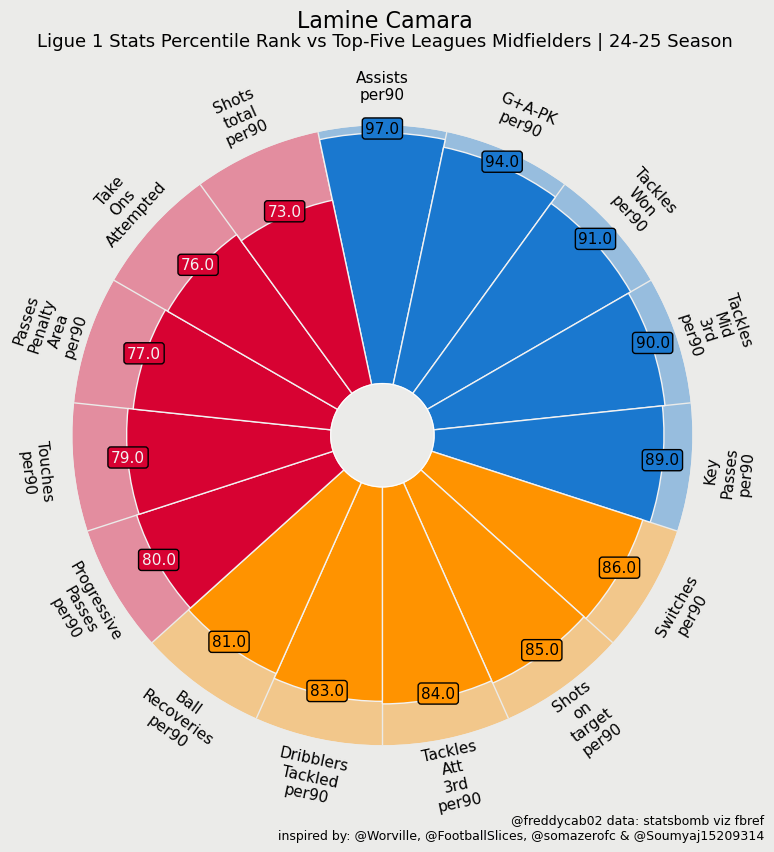

In [111]:
slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    ARlist,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Lamine Camara", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Ligue 1 Stats Percentile Rank vs Top-Five Leagues Midfielders | 24-25 Season",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@freddycab02 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)

plt.show()

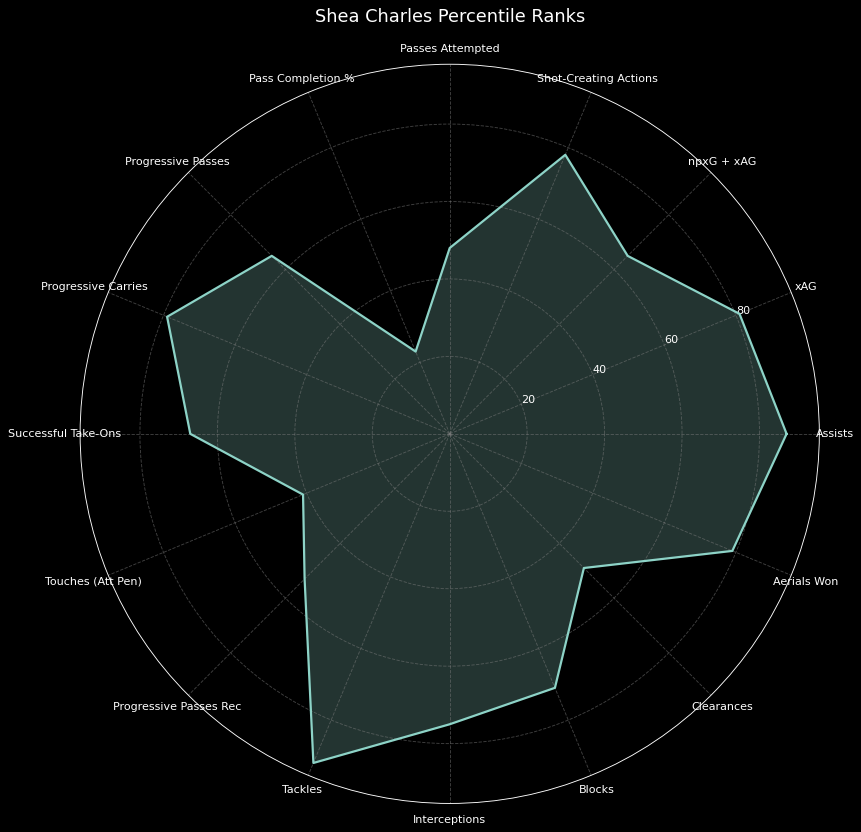

In [139]:
import numpy as np
import matplotlib.pyplot as plt

# Data for the chart
labels = ['Assists', 'xAG', 'npxG + xAG', 'Shot-Creating Actions', 'Passes Attempted', 'Pass Completion %',
          'Progressive Passes', 'Progressive Carries', 'Successful Take-Ons', 'Touches (Att Pen)',
          'Progressive Passes Rec', 'Tackles', 'Interceptions', 'Blocks', 'Clearances', 'Aerials Won']
values = [87, 81, 65, 78, 48, 23, 65, 79, 67, 41, 53, 92, 75, 71, 49, 79]

# Number of variables
num_vars = len(labels)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the plot circular by repeating the first value at the end
values = np.concatenate((values, [values[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(12, 12), dpi=80, subplot_kw=dict(polar=True))

# Plot the data
ax.plot(angles, values, linewidth=2, linestyle='solid', label='Player Stats')

# Fill the area under the line
ax.fill(angles, values, alpha=0.25)

# Add numbered rings (20, 40, 60, 80, 100)
ax.set_yticks([20, 40, 60, 80])
ax.set_yticklabels(['20', '40', '60', '80'])

# Set the labels on the outside of the chart
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, rotation=90, fontsize=10)

# Set the title
ax.set_title('Shea Charles Percentile Ranks', size=16, color='white', pad=20)

# Hide radial grid lines
ax.grid(True, color='gray', linestyle='--', alpha=0.5)

# Show the chart
plt.show()

